In [ ]:
%matplotlib inline


# Image Demo


Many ways to plot images in Matplotlib.

The most common way to plot images in Matplotlib is with
:meth:`~.axes.Axes.imshow`. The following examples demonstrate much of the
functionality of imshow and the many images you can create.




In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

First we'll generate a simple bivariate normal distribution.



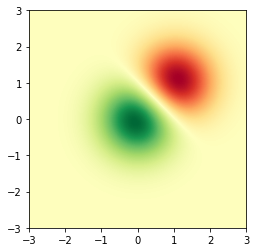

In [2]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

It is also possible to show images of pictures.



C:\Users\rohanr730\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


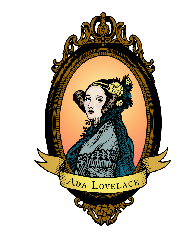

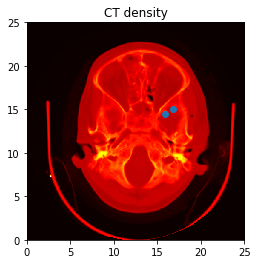

In [3]:
# A sample image
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis


# And another image

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()
A = np.fromstring(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

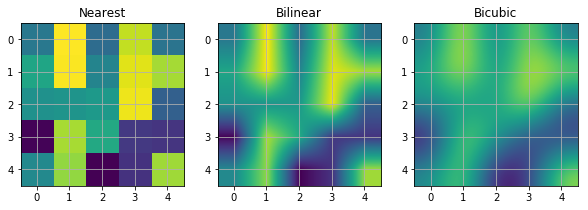

In [4]:
A = np.random.rand(5, 5)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()